# Data Labelling Analysis (DLA) Evaluation Dataset A

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '/home/v6operator/work/notebooks/POST TFM/'
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for data labelling analisys
from data_labelling import mix_data
from data_labelling import split_data
from data_labelling import DataPreProcessor
from data_labelling import ClassificationModels

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/A_Diabetes_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/A_Diabetes_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/A_Diabetes_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/A_Diabetes_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/A_Diabetes_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['gender','age','admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum',
                      'A1Cresult','change','diabetesMed','readmitted']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':        encounter_id  patient_nbr  gender      age admission_type_id  \
 0          81844290        94788  Female  [70-80)                 1   
 1         396159158    135023315    Male  [50-60)                 1   
 2          31258956     18397782    Male  [80-90)                 1   
 3         210691074     67509558    Male  [80-90)                 1   
 4         104902980     23272362  Female  [70-80)                 1   
 ...             ...          ...     ...      ...               ...   
 81407      31296060      3344202    Male  [70-80)                 1   
 81408     159139902     93611655    Male  [60-70)                 5   
 81409     232191828     85600899    Male  [70-80)                 3   
 81410       6740700      8208234  Female  [60-70)                 6   
 81411      60115668     77943780  Female  [40-50)                 6   
 
       discharge_disposition_id admission_source_id  time_in_hospital  \
 0                            1                   7  

## 2. Mix real data with synthetic data

In [5]:
mixed_data = dict()
for name in SYNTHESIZERS :
    mixed_data[name] = mix_data(data['Real'], data[name])
mixed_data

{'GM':        encounter_id  patient_nbr  gender      age admission_type_id  \
 3173      115450098     61796747  Female  [70-80)                 1   
 59569     204140772     37096866  Female  [50-60)                 2   
 10980      94441584     23738481  Female  [70-80)                 5   
 41215     215038926     58670181  Female  [60-70)                 1   
 12673     200105820     90160929    Male  [70-80)                 3   
 ...             ...          ...     ...      ...               ...   
 46511      76150866     81945801    Male  [60-70)                 2   
 10159     174661369     79557568  Female  [70-80)                 1   
 63420      52946686      4795071  Female  [80-90)                 6   
 53639     212416980     31333050  Female  [70-80)                 1   
 53305     361520620     68029829  Female  [70-80)                 3   
 
        discharge_disposition_id  admission_source_id  time_in_hospital  \
 3173                         18                   17

- 0 for real data
- 1 for synthetic data

## 2. Split train and test data

In [6]:
train_len = 0.8
train_data = dict()
test_data = dict()
for name in SYNTHESIZERS :
    print(name)
    train_data[name], test_data[name] = split_data(mixed_data[name], train_len)
    print(train_data[name].shape, test_data[name].shape)
    print('Train data', train_data[name].groupby('Label').size())
    print('Test data', test_data[name].groupby('Label').size())
    print('##############################################')

GM
(130259, 21) (32564, 21)
Train data Label
0.0    65157
1.0    65102
dtype: int64
Test data Label
0.0    16255
1.0    16309
dtype: int64
##############################################
SDV
(130259, 21) (32564, 21)
Train data Label
0.0    65114
1.0    65145
dtype: int64
Test data Label
0.0    16297
1.0    16267
dtype: int64
##############################################
CTGAN
(130259, 21) (32564, 21)
Train data Label
0.0    65135
1.0    65124
dtype: int64
Test data Label
0.0    16277
1.0    16287
dtype: int64
##############################################
WGANGP
(130259, 21) (32564, 21)
Train data Label
0.0    65232
1.0    65027
dtype: int64
Test data Label
0.0    16179
1.0    16385
dtype: int64
##############################################


## 3. Train Classifiers

In [7]:
categorical_columns = ['gender','age','admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum',
                        'A1Cresult','change','diabetesMed','readmitted']
numerical_columns = numerical_columns = data['Real'].select_dtypes(include=['int64']).columns.tolist()
categories = [np.array(range(3)), np.array(range(10)), np.array(range(9)), np.array(range(29)), np.array(range(21)), 
            np.array(range(4)), np.array(range(4)), np.array(range(2)), np.array(range(2)), np.array(range(3))]

#initialize classifiers
classifiers_all = dict()
data_preprocessors = dict()

target = 'Label'

for name in SYNTHESIZERS : 
    print(name)
    
    classifiers_all[name] = ClassificationModels()
    
    data_preprocessors[name] = DataPreProcessor(categorical_columns, numerical_columns, categories)
    x_train = data_preprocessors[name].preprocess_train_data(train_data[name].iloc[:, train_data[name].columns != target])
    y_train = train_data[name].loc[:, target]
    
    classifiers_all[name].train_classifiers(x_train, y_train)
    
    print('####################################################')

GM
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
SDV
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
CTGAN
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
WGANGP
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################


## 5. Evaluate Classifiers

In [8]:
results_all = dict()

for name in SYNTHESIZERS : 
    print(name)
    
    x_test = data_preprocessors[name].preprocess_test_data(test_data[name].loc[:, test_data[name].columns != target])
    print(x_test.shape)
    y_test = test_data[name].loc[:, target]
    
    classifiers_all[name].evaluate_classifiers(x_test, y_test)
    print('####################################################')

GM
(32564, 97)
RF Tested
  model  accuracy  precision  recall      f1
0    RF    0.8019     0.8152  0.7818  0.7981
KNN Tested
  model  accuracy  precision  recall      f1
0   KNN    0.6538      0.773  0.4372  0.5585
DT Tested
  model  accuracy  precision  recall      f1
0    DT     0.726     0.7214  0.7378  0.7295
SVM Tested
  model  accuracy  precision  recall      f1
0   SVM     0.479     0.4794  0.4702  0.4748
MLP Tested
  model  accuracy  precision  recall     f1
0   MLP    0.7616     0.7556  0.7746  0.765
####################################################
SDV
(32564, 97)
RF Tested
  model  accuracy  precision  recall      f1
0    RF    0.9543     0.9706  0.9368  0.9534
KNN Tested
  model  accuracy  precision  recall      f1
0   KNN    0.8296     0.9544  0.6919  0.8022
DT Tested
  model  accuracy  precision  recall      f1
0    DT    0.9187     0.9194  0.9177  0.9185
SVM Tested
  model  accuracy  precision  recall      f1
0   SVM    0.5164     0.5092   0.882  0.6457
MLP Tested
  

## 6. Analyse models results

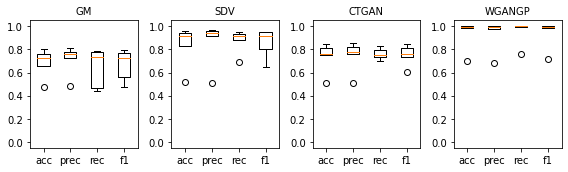

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(8, 2.5))
axs_idxs = [[0,0], [0,1], [1,0], [1,1]]
axs_idxs = [0, 1, 2, 3]
idx = dict(zip(SYNTHESIZERS,axs_idxs))

for name in SYNTHESIZERS :
    ax_plot = axs[idx[name]]
    classifiers_all[name].plot_classification_metrics(ax_plot)
    ax_plot.set_title(name, fontsize=10)

plt.tight_layout()
fig.savefig('DATA LABELLING RESULTS/CLASSIFICATION_METRICS.svg', bbox_inches='tight')